Антенная решетка (рис. 4.14, б) имеет 6 полуволновых линейных симметричных электрических вибраторов. Расстояние $d_2 = 0,5λ$ . Все вибраторы возбуждаются токами равных амплитуд. Какова должна быть разность фаз токов двух соседних вибраторов ψ, чтобы направление максимального излучения в E – плоскости было под углами $θ = 20°$и $θ = 160°$. Рассчитать нормированную амплитудную характеристику направленности в E – плоскости и построить её нормированную амплитудную диаграмму направленности в полярной и прямоугольной системах координат.

![](../img/Chapter_4_example_2_picture_1.png)

**Решение задачи**
$F(θ)=|\frac{1}{f(θ_{гл})}\frac{cos(klsin(θ))-cos(kl)}{cos(θ)}|*|\frac{\frac{sin(n_2kd_2sin(θ)-ψ)}{2}}{\frac{sin(kd_2sin(θ)-ψ)}{2}}|$ (1)

In [1]:
# Импортируем необходимые библиотеки
import numpy
import matplotlib.pyplot as plt

In [2]:
psi = 1.074
n2 = 6  # число излучателей в ряду решетки
d2 = 0.5  # шаг решетки в долях длины волны
L = 0.25  # длина плеча вибратора
# Задаем угл тета в градусах с параметрами:
# начальное значение - 0.01
# конечное значение - 360
# количество точек - 360
TETA = (numpy.pi/180)*numpy.linspace(0.01, 360, 360)

In [3]:
# Функция get_unnormalized_hn рассчитывает ненормированную характеристику
# направленности в зависимости от угла teta по формуле 4.
def get_unnormalized_hn(teta):
    return numpy.array(
        numpy.abs((numpy.cos(2*numpy.pi*L*numpy.sin(teta))-numpy.cos(2*numpy.pi*L))/numpy.cos(teta)) *
        numpy.abs((numpy.sin(n2*(2*numpy.pi*d2*numpy.sin(teta)-psi)/2)/
                   numpy.sin((2*numpy.pi*d2*numpy.sin(teta)-psi)/2)))
    )


# Функция get_max_hn рассчитывает максимальное значение ненормированной характеристики направленности
def get_max_hn(hn):
    return numpy.max(hn)

# Функция get_normalized_hn рассчитывает ненормированную характеристику направленности,
# определяет ее максимальное значение,
# а потом рассчитывает нормированную характеристику направленности
def get_normalized_hn(teta, maxf):
    f = get_unnormalized_hn(teta)
    return f/maxf

In [4]:
f = get_unnormalized_hn(TETA)  # получаем ненормированную характеристику направленности
M = get_max_hn(f)  # поулаем максимальное значение
F = get_normalized_hn(TETA, M)
print(M)

5.512360016038924


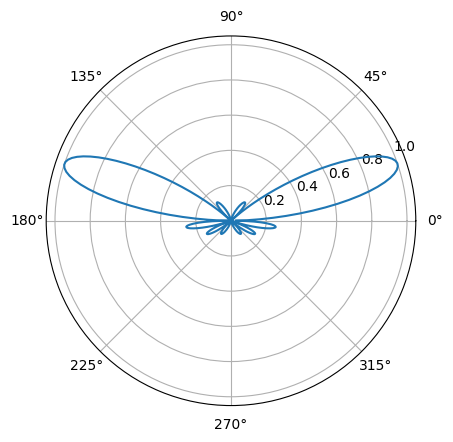

In [5]:
plt.polar(TETA, F)
plt.show()

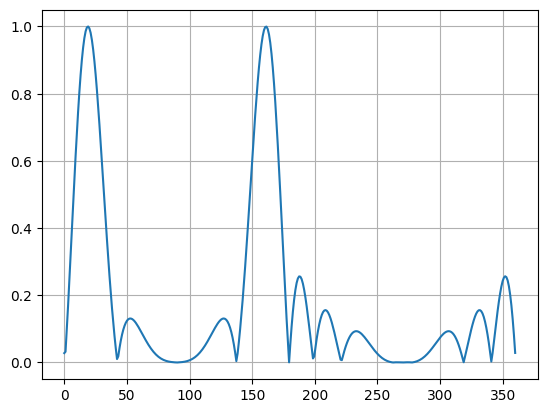

In [6]:
plt.plot(TETA/(numpy.pi/180), F)
plt.grid()